## Description
It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import uniform
from pathlib import Path

In [10]:
GWAS_DIR = Path(os.environ["PHENOPLIER_NULLSIM_RESULTS_DIR"]) / "harmonized_gwas"
print(GWAS_DIR)

/tmp/phenoplier/results/gls/gwas/null_sims/ukb/harmonized_gwas


In [11]:
def load_gwas_data(filename):
    """Load GWAS data, filter P values, and return a DataFrame."""
    filepath = os.path.join(GWAS_DIR, filename)
    gwas = pd.read_csv(filepath, sep="\t")
    gwas = gwas[(gwas["pvalue"] >= 0) & (gwas["pvalue"] <= 1)]
    return gwas

In [12]:
def plot_manhattan(gwas, chr_col, bp_col, p_col, snp_col, title):
    """Generate a Manhattan plot."""
    gwas["-log10P"] = -np.log10(gwas[p_col])
    plt.figure(figsize=(20, 10))
    gwas[chr_col] = gwas[chr_col].astype("category")
    gwas.sort_values(by=[chr_col, bp_col], inplace=True)
    gwas["ind"] = range(len(gwas))
    groups = gwas.groupby(chr_col)

    for i, (name, group) in enumerate(groups):
        plt.scatter(
            group["ind"],
            group["-log10P"],
            s=5,
            label=name,
            color=plt.cm.tab20.colors[i % 20]
        )

    plt.axhline(-np.log10(5e-8), color="red", linestyle="--", label="Genome-wide line")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    plt.title(title)
    plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

In [13]:
def plot_qq(p_values, title):    
    """Generate a QQ plot for GWAS p-values."""
    # Use the uniform distribution as the null distribution!!!
    # Do -log10 transformation to p-values!
    # use func qq plot 2samples
    # x: expected array
    # y: observed array
    
    # Use np.random.unitform to generate expected values with the same size as the observed p_values
    # Or may use linspace instead of random.uniform, don't include 0 and 1. maybe 1 is okay but 0 is not.
    
    # Run TWAS when 
    
    # Calculate expected p-values (under uniform distribution)
    n = len(p_values)
    expected_p_values = np.arange(1, n + 1) / (n + 1)
    
    # Convert to -log10 scale
    observed_log_p = -np.log10(p_values)
    expected_log_p = -np.log10(expected_p_values)
    
    qqplot_2samples(expected_log_p, observed_log_p, xlabel="Expected -log10(p)", ylabel="Observed -log10(p)", line='45')
    plt.title(title)
    plt.show()

Phenotype 0: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.492561  0.686241     0.010794   
1                 G   0.087379  0.176246  1.352404     0.027536   
2                 G   0.015534  0.881973  0.148469     0.006695   
3                 C   0.057282  0.557077  0.587189     0.015218   
4                 G   0.000000  0.717065 -0.362384    -0.009545   

   standard_error  sample_size  n_cases  
0        0.015729          312      NaN  
1        0.020359       

/tmp/ipykernel_913461/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


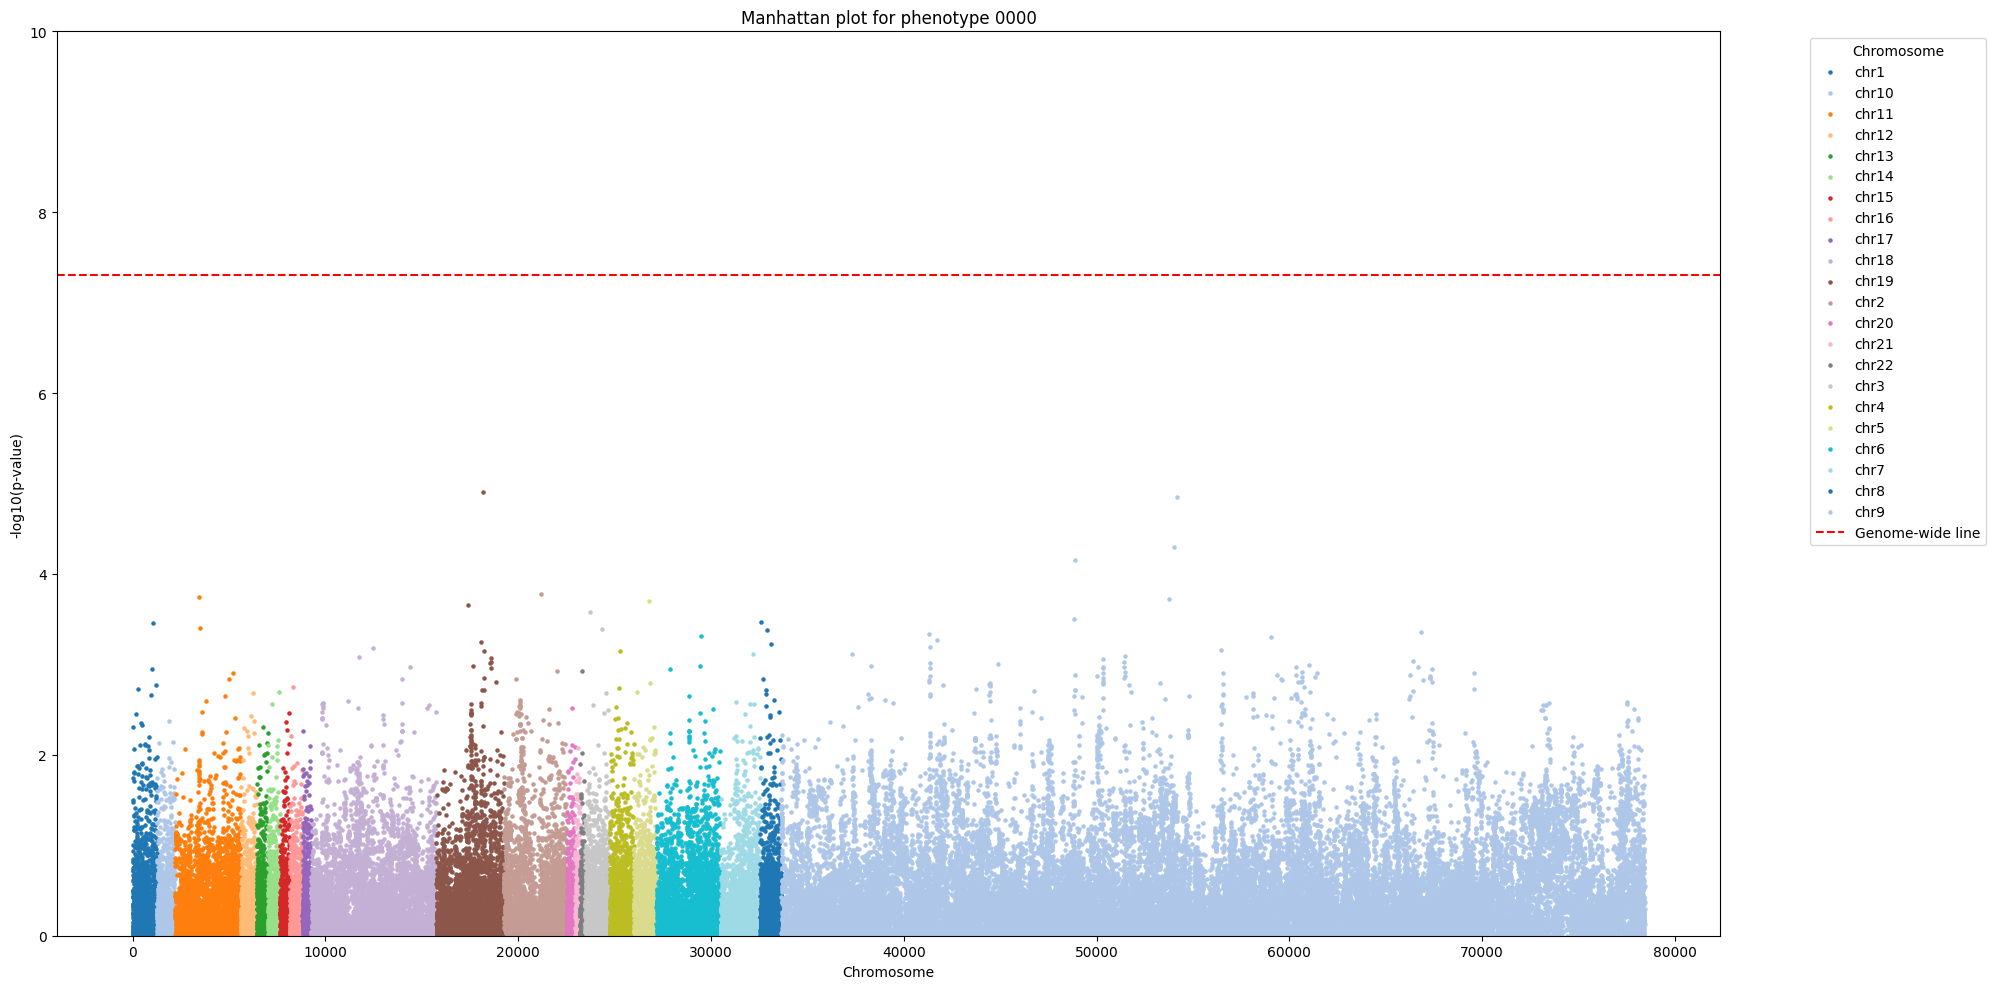

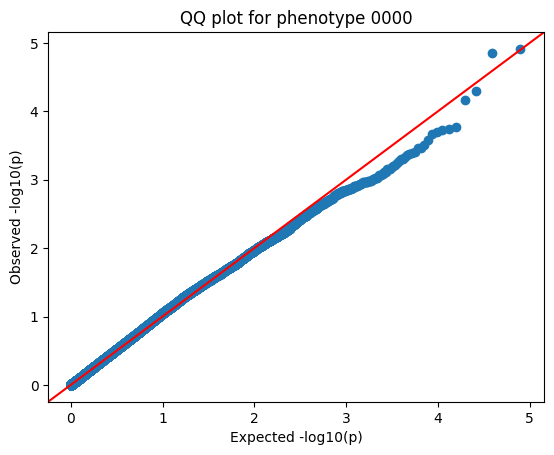

Phenotype 1: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.781886  0.276862     0.004379   
1                 G   0.087379  0.887131 -0.141935    -0.002906   
2                 G   0.015534  0.112308  1.587904     0.072000   
3                 C   0.057282  0.037951  2.075382     0.054081   
4                 G   0.000000  0.148062  1.446411     0.038306   

   standard_error  sample_size  n_cases  
0        0.015816          312      NaN  
1        0.020474       

/tmp/ipykernel_913461/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


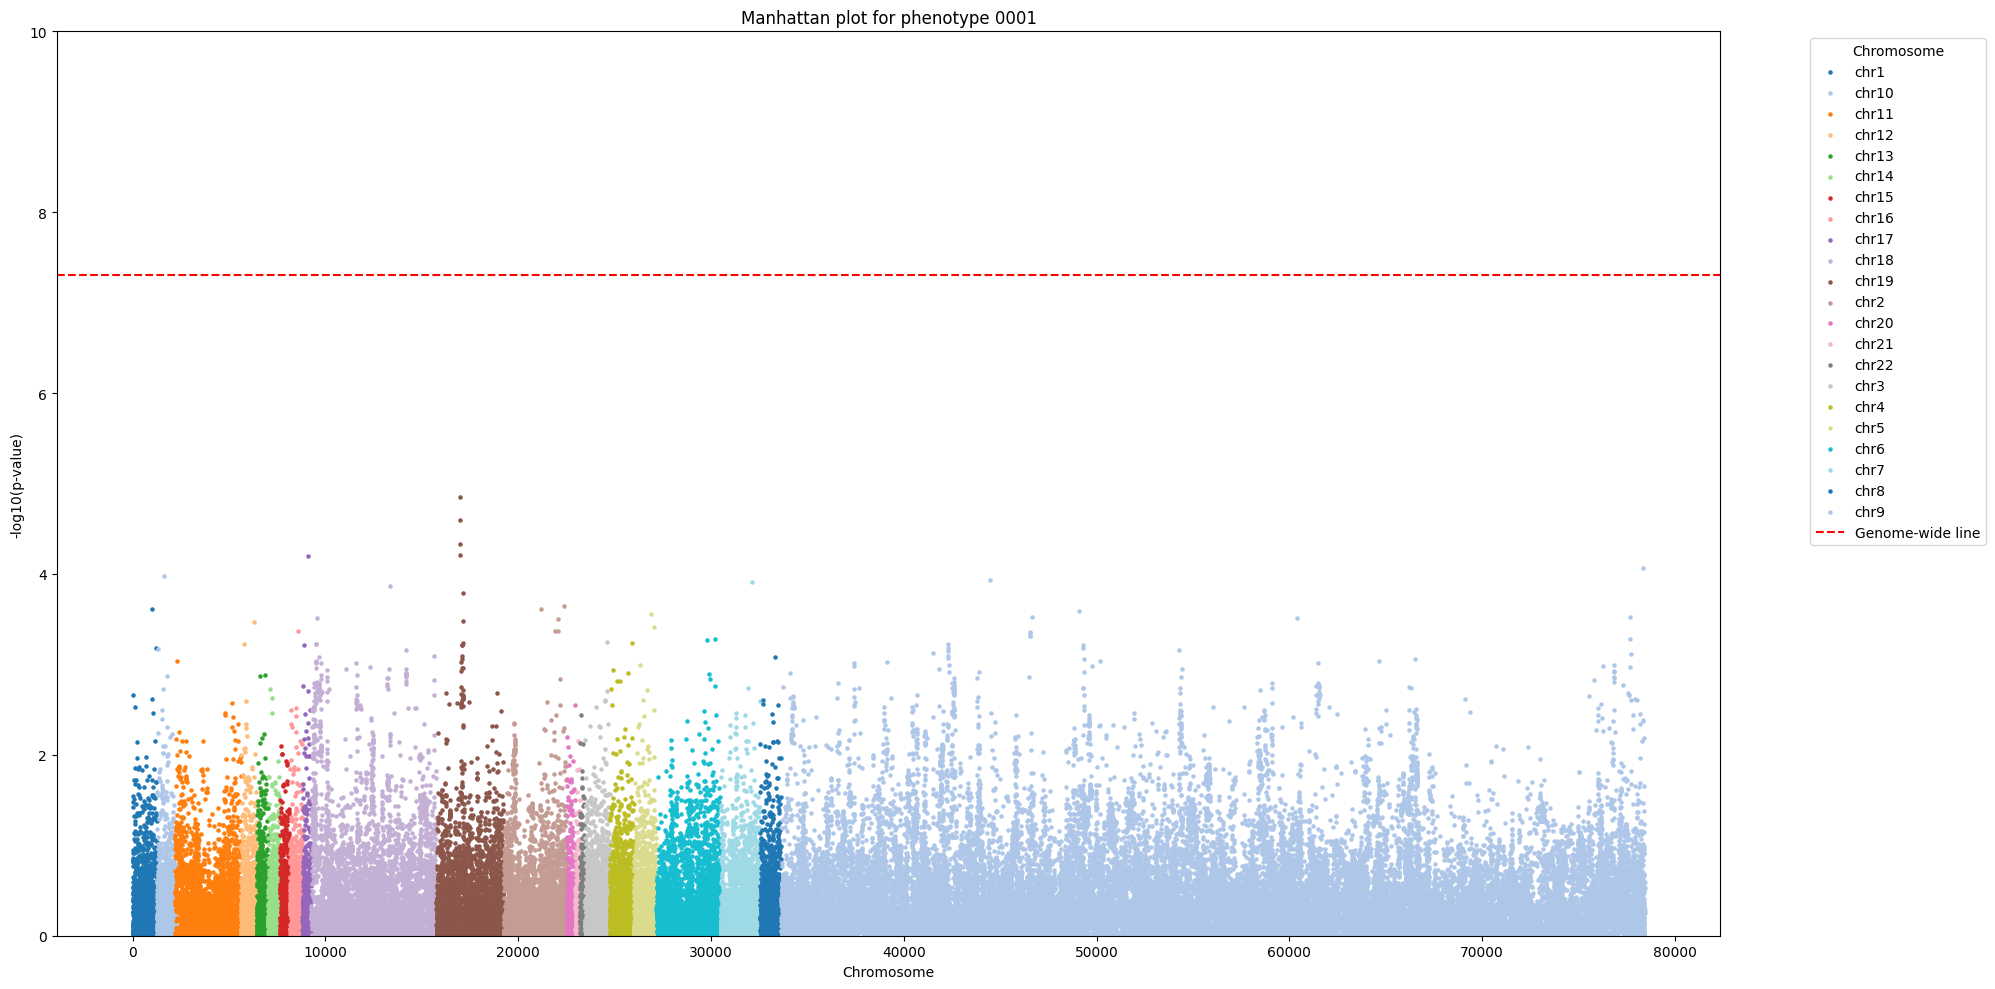

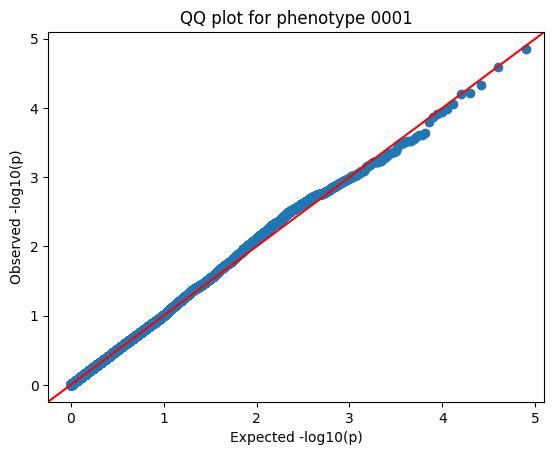

Phenotype 2: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.900542 -0.124977    -0.001985   
1                 G   0.087379  0.673236  0.421711     0.008669   
2                 G   0.015534  0.690041  0.398799     0.018156   
3                 C   0.057282  0.235553  1.186176     0.031035   
4                 G   0.000000  0.422497 -0.802097    -0.021328   

   standard_error  sample_size  n_cases  
0        0.015879          312      NaN  
1        0.020555       

/tmp/ipykernel_913461/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


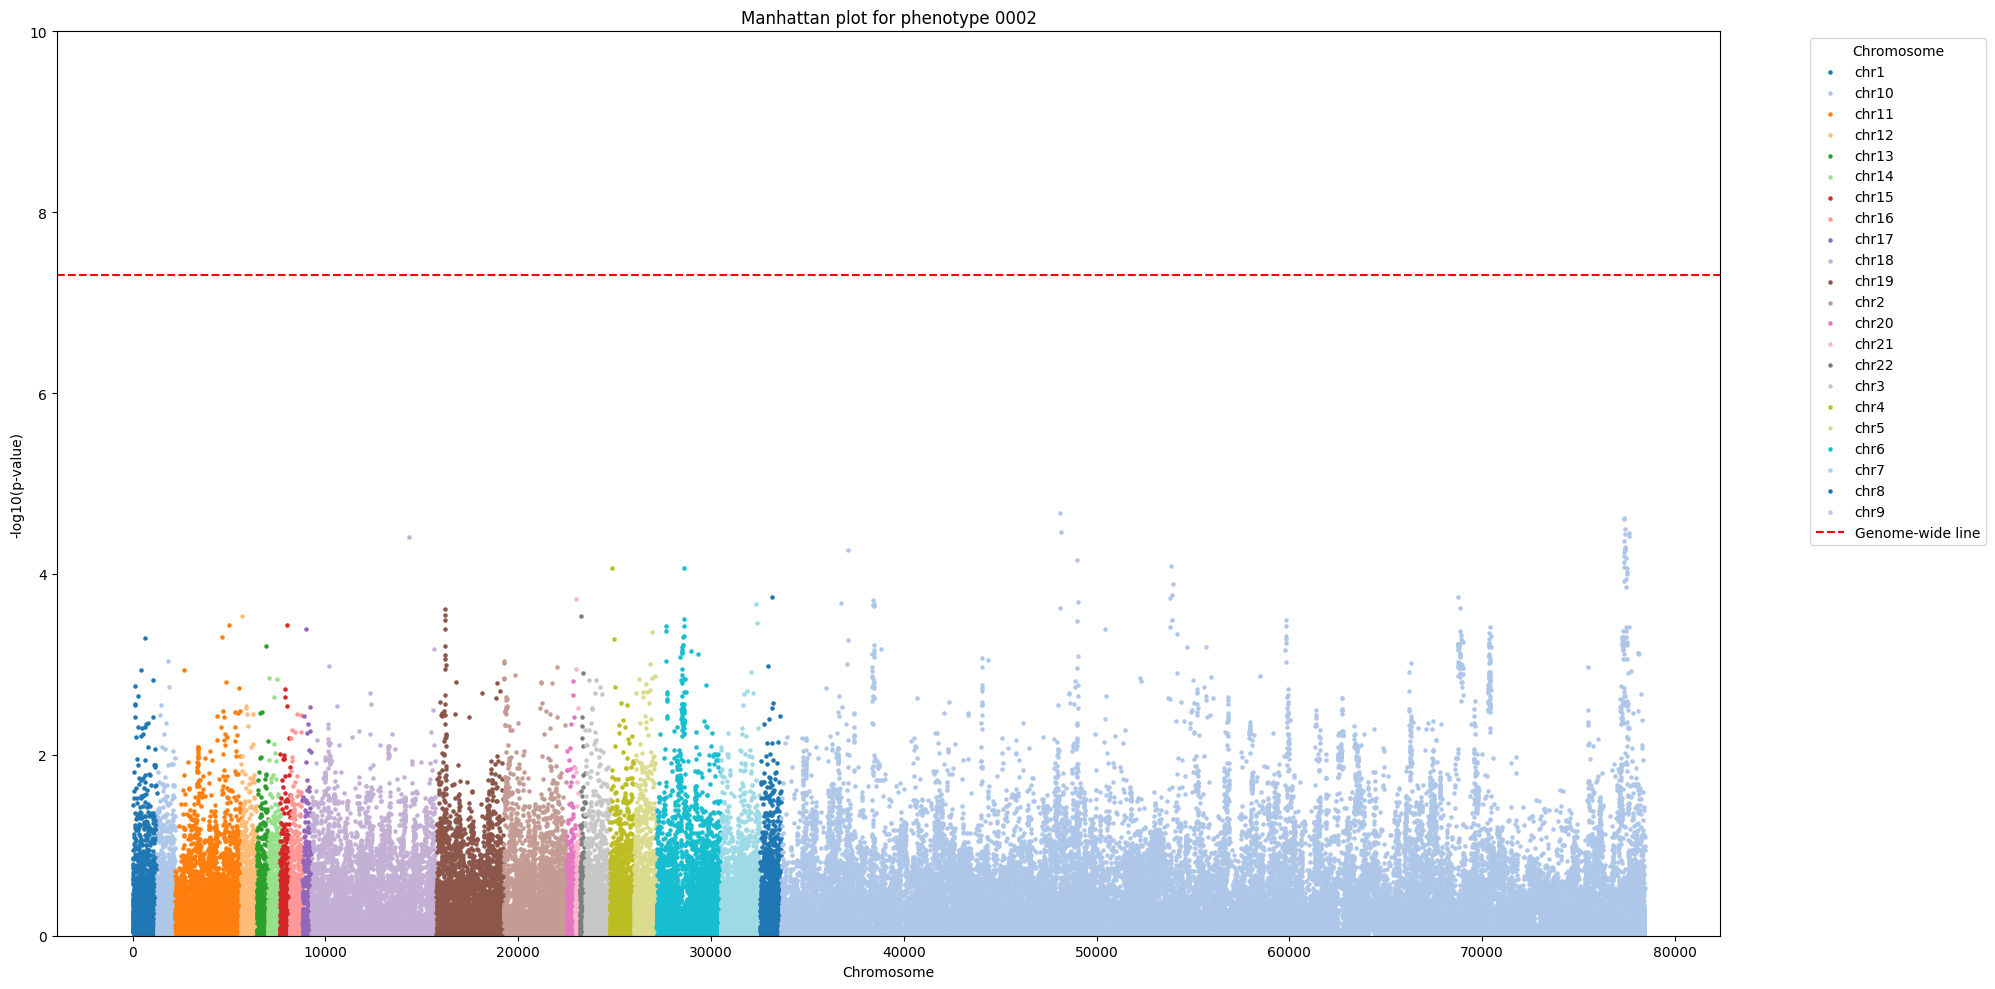

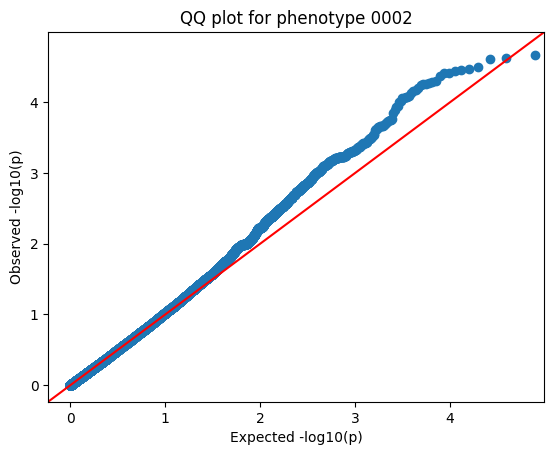

Phenotype 3: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.481066 -0.704589    -0.011313   
1                 G   0.087379  0.595309 -0.531158    -0.011040   
2                 G   0.015534  0.618402 -0.498116    -0.022929   
3                 C   0.057282  0.968735  0.039195     0.001037   
4                 G   0.000000  0.198534  1.285739     0.034566   

   standard_error  sample_size  n_cases  
0        0.016055          312      NaN  
1        0.020783       

/tmp/ipykernel_913461/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


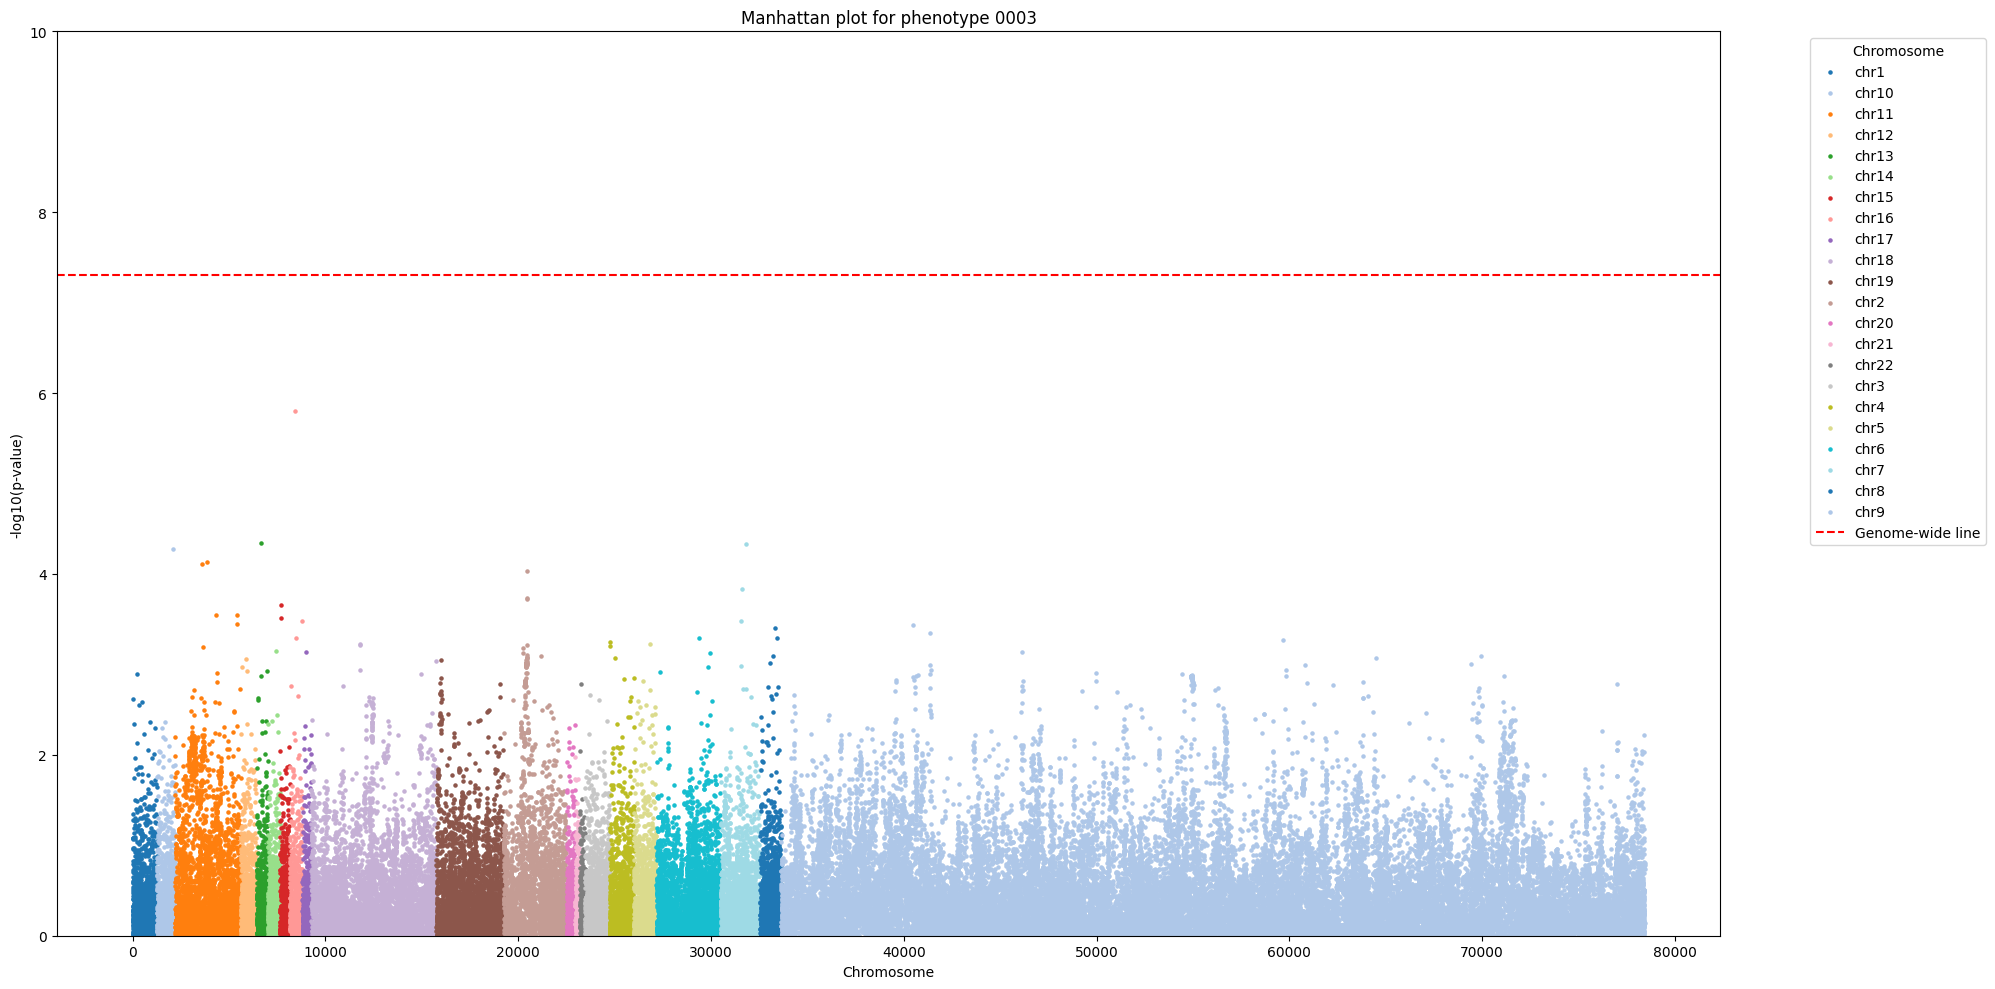

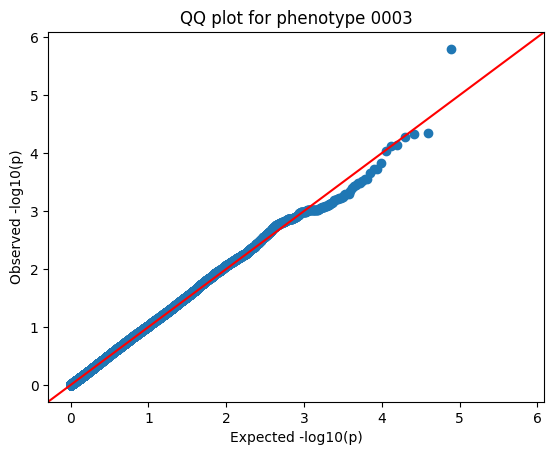

Phenotype 4: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.348084  0.938312     0.014887   
1                 G   0.087379  0.286928  1.064885     0.021870   
2                 G   0.015534  0.953039 -0.058891    -0.002679   
3                 C   0.057282  0.573549 -0.562832    -0.014714   
4                 G   0.000000  0.479573  0.706990     0.018783   

   standard_error  sample_size  n_cases  
0        0.015865          312      NaN  
1        0.020537       

/tmp/ipykernel_913461/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


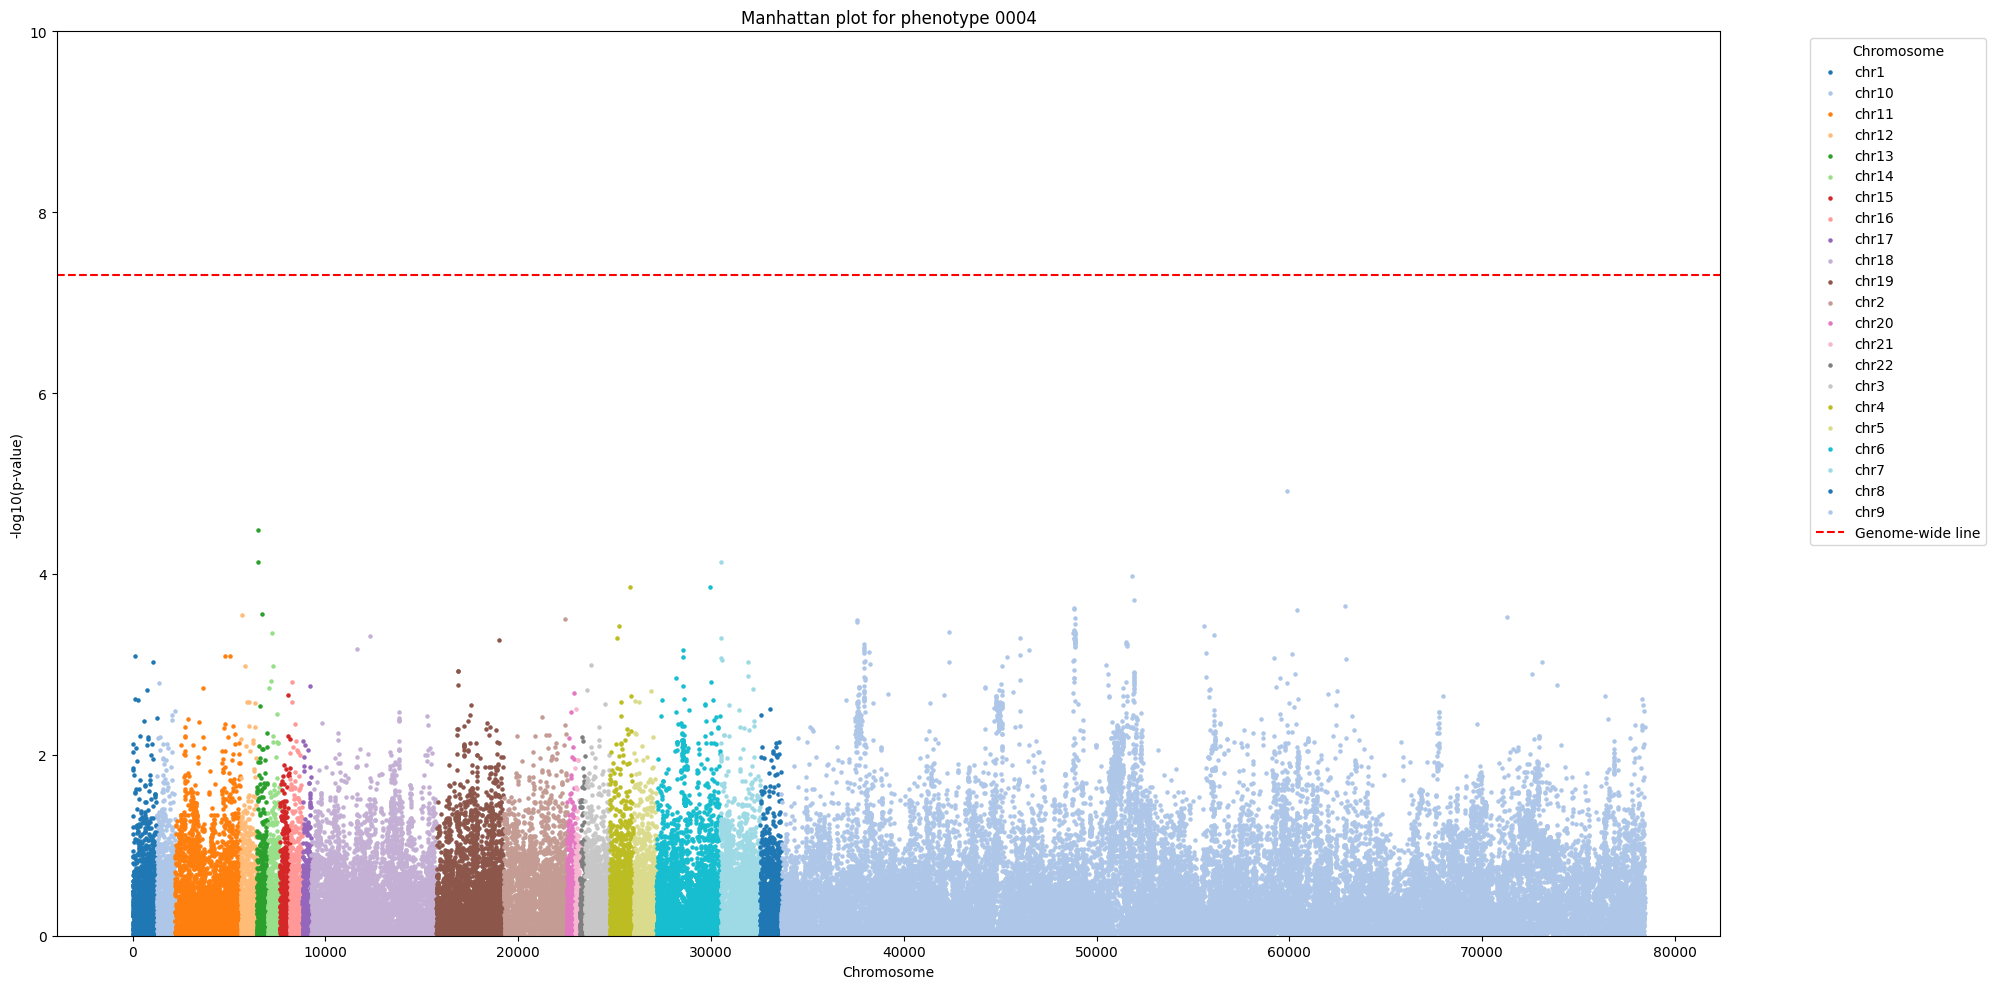

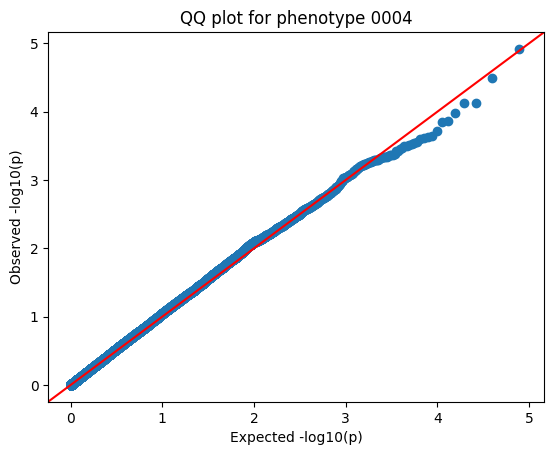

In [14]:
num_rand_phenotypes = 5

for phenotype in range(num_rand_phenotypes):
    filename = f"random.pheno{phenotype:04d}.glm.linear.tsv-harmonized.txt"
    
    # Load data
    gwas = load_gwas_data(filename)
    print(f"Phenotype {phenotype}: Dimensions = {gwas.shape}")
    print(gwas.head())
    
    # Manhattan plot
    plot_manhattan(
        gwas,
        chr_col="chromosome",
        bp_col="position",
        p_col="pvalue",
        snp_col="variant_id",
        title=f"Manhattan plot for phenotype {phenotype:04d}"
    )
    
    # QQ plot
    plot_qq(gwas["pvalue"], title=f"QQ plot for phenotype {phenotype:04d}")
